# Models utilitzant només les variables personals/socials

In [1]:
import pandas as pd

X_train_std = pd.read_csv("./preprocessed_datasets/X_train_std.csv")
X_test_std = pd.read_csv("./preprocessed_datasets/X_test_std.csv")
y_train = pd.read_csv("./preprocessed_datasets/y_train.csv")
y_test = pd.read_csv("./preprocessed_datasets/y_test.csv")

Transformem les dades a arrays

In [2]:
import numpy as np

y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Filtrem els datasets per a que només continguin variables socials o de la persona

In [3]:
X_train_std.columns

Index(['index', 'ID_Zenodo', 'dayoftheweek', 'occurrence_mental', 'bienestar',
       'energia', 'estres', 'sueno', 'no2bcn_24h', 'no2bcn_12h', 'no2gps_24h',
       'no2gps_12h', 'pm25bcn', 'BCμg', 'tmean_24h', 'tmean_12h', 'humi_24h',
       'humi_12h', 'pressure_24h', 'pressure_12h', 'precip_24h', 'precip_12h',
       'maxwindspeed_24h', 'maxwindspeed_12h', 'age_yrs',
       'actividadfisica_Yes', 'ordenador_Yes', 'dieta_Yes', 'alcohol_Yes',
       'drogas_Yes', 'bebida_Yes', 'enfermo_Yes', 'otrofactor_Yes',
       'precip_12h_binary_1', 'precip_24h_binary_1', 'noise_total_LDEN_55_1.0',
       'access_greenbluespaces_300mbuff_Yes',
       'incidence_cat_Mobility incidence', 'incidence_cat_No incidence',
       'incidence_cat_Physical and Mobility incidences',
       'incidence_cat_Physical incidence', 'smoke_Yes', 'psycho_Yes',
       'gender_Hombre', 'gender_Mujer', 'gender_Otra', 'district_16',
       'district_Ciutat Vella', 'district_Eixample', 'district_Gràcia',
       'district

In [4]:
socialPersonal_columns = ['occurrence_mental', 'bienestar',
       'energia', 'estres', 'sueno','age_yrs',
       'actividadfisica_Yes', 'ordenador_Yes', 'dieta_Yes', 'alcohol_Yes',
       'drogas_Yes', 'bebida_Yes', 'enfermo_Yes', 'otrofactor_Yes','incidence_cat_Mobility incidence', 'incidence_cat_No incidence',
       'incidence_cat_Physical and Mobility incidences',
       'incidence_cat_Physical incidence', 'smoke_Yes', 'psycho_Yes',
       'gender_Hombre', 'gender_Mujer', 'gender_Otra','education_Bachillerato', 'education_Primario o menos',
       'education_Universitario', 'covid_afecta_Yes']

X_train_std = X_train_std[socialPersonal_columns]
X_test_std = X_test_std[socialPersonal_columns]


## Model de regressió lineal

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

lr = LinearRegression(fit_intercept=True).fit(X_train_std ,y_train)
lr_r2_train = r2_score(y_train, lr.predict(X_train_std))
lr_r2_val = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='r2').mean()
lr_r2_test = r2_score(y_test, lr.predict(X_test_std))

In [8]:
print(f"R2 train: {lr_r2_train}")
print(f"R2 val: {lr_r2_val}")
print(f"R2 test: {lr_r2_test}")

R2 train: 0.23582854789367624
R2 val: -3.9139248261780765e+22
R2 test: 0.19657393745448593


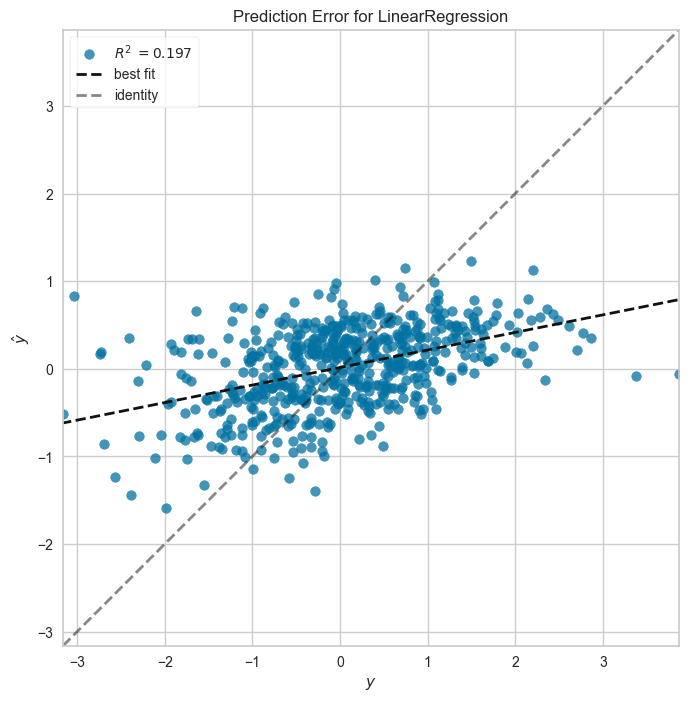

In [9]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import prediction_error

plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test_std, y_test, is_fitted=True)

### Ridge Regression

In [10]:
from sklearn.model_selection import cross_val_score
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alpha, scoring="r2", cv=5).fit(X_train_std, y_train)
ridge_r2_test= ridge_cv.score(X_test_std, y_test)
ridge_r2_val = ridge_cv.best_score_
ridge_r2_val2 = np.mean(cross_val_score( RidgeCV(alphas=alpha, scoring="r2", cv=5), X_train_std, y_train, scoring="r2" ))
ridge_r2_train= ridge_cv.score(X_train_std, y_train)

print("Train R2: ", ridge_r2_train)
print("Validation R2: ", ridge_r2_val)
print("Validation R2: ", ridge_r2_val2)

print("Test R2: ", ridge_r2_test)
print(ridge_cv.alpha_)

Train R2:  0.2360323062120162
Validation R2:  0.2128389205047243
Validation R2:  0.2128389205047243
Test R2:  0.19737575954255715
1.0


### Lasso Regression

In [11]:
alpha = [1e-3, 1e-2, 1e-1, 1, 100]
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=0, alphas=alpha).fit(X_train_std, y_train)
lasso_r2_test= lasso_cv.score(X_test_std, y_test)
lasso_r2_val = np.mean(cross_val_score( LassoCV(alphas=alpha, random_state=0, cv=5), X_train_std, y_train, scoring="r2" ))
lasso_r2_train= lasso_cv.score(X_train_std, y_train)

print("Train R2: ", lasso_r2_train)
print("Validation R2: ", lasso_r2_val)
print("Test R2: ", lasso_r2_test)
print(lasso_cv.alpha_)

Train R2:  0.23551266486696865
Validation R2:  0.21350756509587004
Test R2:  0.1961233667968889
0.001


In [12]:
r2_results = pd.DataFrame({'LR': lr_r2_train, 'Ridge': ridge_r2_train, 'Lasso': lasso_r2_train,}, index=['Train R2'])


print([lr_r2_val, ridge_r2_val, lasso_r2_val])
lr_r2_val = np.mean(lr_r2_val)
r2_results.loc['CV (Val) R2', :] = [lr_r2_val, ridge_r2_val, lasso_r2_val]
r2_results.loc['Test R2', :] = [lr_r2_test, ridge_r2_test, lasso_r2_test]


r2_results.loc['lambda','LR']=0
r2_results.loc['lambda','Ridge']=ridge_cv.alpha_
r2_results.loc['lambda','Lasso']=lasso_cv.alpha_
r2_results


[-3.9139248261780765e+22, 0.2128389205047243, 0.21350756509587004]


,LR,Ridge,Lasso
Train R2,2.358285e-01,0.236032,0.235513
CV (Val) R2,-3.913925e+22,0.212839,0.213508
Test R2,1.965739e-01,0.197376,0.196123
lambda,0.000000e+00,1.000000,0.001000


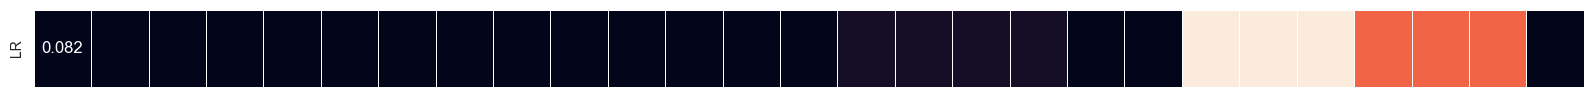

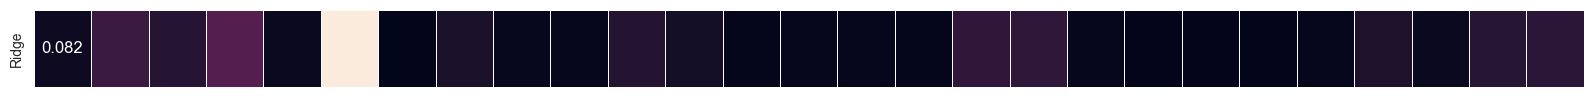

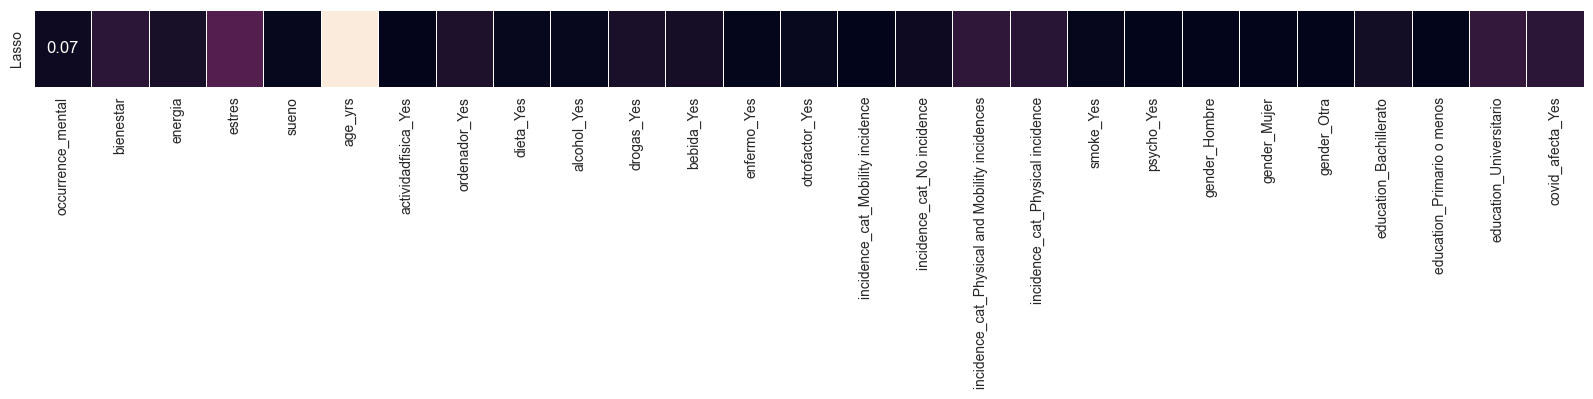

In [13]:

import matplotlib.pyplot as plt
import seaborn as sns

weights = pd.DataFrame({'LR':lr.coef_, 'Ridge':ridge_cv.coef_, 'Lasso':lasso_cv.coef_},index=X_train_std.columns)

fig, ax = plt.subplots(figsize = (20,1))
sns.heatmap(weights.T.loc[['LR'],:].abs(), annot=True, linewidths=.5, ax=ax, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Ridge'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=False);

plt.figure(figsize = (20,1))
sns.heatmap(weights.T.loc[['Lasso'],:].abs(), annot=True, linewidths=.5, cbar=False, xticklabels=True);

# MLP

In [14]:
X_train_std_old = X_train_std.copy()
X_test_std_old = X_test_std.copy()

In [15]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense,  Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2

callback = EarlyStopping(monitor='loss',patience=3)

model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_std.shape[1],), kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dense(1)
])
# Define the optimizer and learning rate
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mean_squared_error'])
callback = EarlyStopping(monitor='val_mean_squared_error',patience=100)

# Train the model
num_epochs = 2000
batch_size = 256
history = model.fit(X_train_std, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=1, callbacks=[callback])

# Evaluate the model
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print('Training MSE: {:.4f}'.format(train_mse))
print('Testing MSE: {:.4f}'.format(test_mse))
print('Training R-squared: {:.4f}'.format(train_r2))
print('Testing R-squared: {:.4f}'.format(test_r2))



Epoch 1/2000


C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 4.4835 - mean_squared_error: 1.1157 - val_loss: 3.9892 - val_mean_squared_error: 0.9313
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9043 - mean_squared_error: 0.9441 - val_loss: 3.5761 - val_mean_squared_error: 0.9138
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.4978 - mean_squared_error: 0.9239 - val_loss: 3.1939 - val_mean_squared_error: 0.8856
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.1441 - mean_squared_error: 0.9132 - val_loss: 2.8535 - val_mean_squared_error: 0.8537
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7854 - mean_squared_error: 0.8523 - val_loss: 2.5488 - val_mean_squared_error: 0.8142
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.4871 - mean_squared_error: 0.8098 - val_loss: 2.2702 - val_mean_squared_error: 0.7629
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.2246 - mean_squared_error: 0.7661 - val_loss: 2.0667 - val_mean_squared

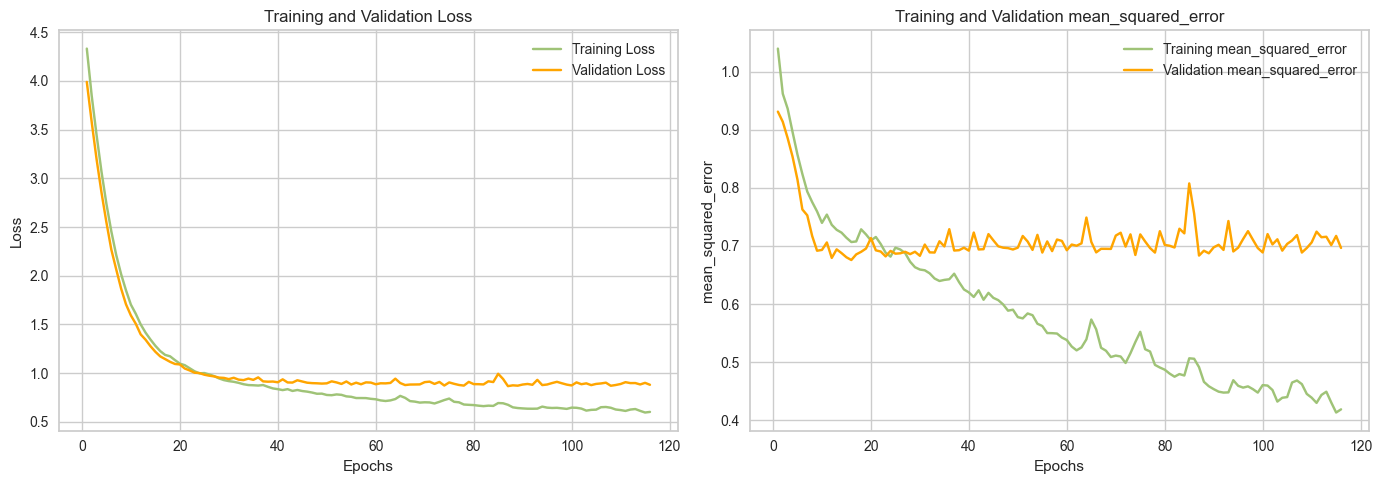

In [16]:
# Plot leaning curves
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['mean_squared_error']
  val_accuracy = history.history['val_mean_squared_error']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training mean_squared_error')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation mean_squared_error')
  axes[1].set_title('Training and Validation mean_squared_error')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('mean_squared_error')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

plot_curves(history)

In [17]:
from sklearn.neural_network import MLPRegressor
regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train_std, y_train)
regr.score(X_test_std, y_test)

C:\Users\adria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


0.14774551229212063